# Прогнозирование вероятности приобретения клиентом компании машиноместа

### Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train_dataset_Самолет.csv', low_memory=False)

### Изучение данных

In [3]:
data.head()

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB


In [5]:
data.duplicated().sum()

0

In [6]:
len(data['client_id'].unique())

4817

Посмотреть реальные значения классов для клиентов

In [7]:
data['report_date'].min()

'2021-02-01'

In [8]:
data['report_date'].max()

'2023-02-01'

Имеем в распоряжении данные по 4817 клиентам за два года

In [9]:
data['target'].value_counts()

target
0    14020
1      436
Name: count, dtype: int64

Видим четкий дисбаланс классов

In [10]:
len(data[data['target'] == 1]['client_id'].unique())

183

Повторяющиеся единицы. Всего 183 купивших из 436

In [11]:
data.isna().sum()

report_date        0
client_id          0
target             0
col1           14453
col2           14450
               ...  
col2659        13950
col2660         6420
col2661         6420
col2662         6420
col2663            0
Length: 2666, dtype: int64

Много пропущенных значений

In [12]:
data_obj = data.select_dtypes(object)

In [13]:
data_obj.columns

Index(['report_date', 'col49', 'col50', 'col51', 'col52', 'col53', 'col54',
       'col55', 'col56', 'col57',
       ...
       'col1653', 'col1654', 'col2191', 'col2192', 'col2193', 'col2194',
       'col2195', 'col2196', 'col2197', 'col2198'],
      dtype='object', length=347)

In [34]:
data['report_date'].value_counts()

report_date
2023-01-01    1159
2023-02-01    1137
2022-12-01     973
2022-11-01     947
2022-10-01     894
2022-08-01     877
2022-09-01     872
2022-07-01     805
2022-06-01     797
2022-05-01     764
2022-04-01     678
2022-03-01     648
2022-01-01     618
2022-02-01     607
2021-12-01     546
2021-11-01     386
2021-10-01     341
2021-09-01     292
2021-08-01     267
2021-07-01     195
2021-06-01     150
2021-05-01     144
2021-04-01     141
2021-03-01     110
2021-02-01     108
Name: count, dtype: int64

In [38]:
df_id = data.sort_values('report_date')
df_id = df_id.dropna(thresh=int(len(df_id)*0.95), axis=1)
df_id.drop(columns=['col1454', 'report_date'], axis=1, inplace=True)
df_id.reset_index(drop=True, inplace=True)

In [39]:
df_id

,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,col2173,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
0,491,0,0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,...,1.0,1.000000,29.11,29.11,29.110000,1.91,1.91,1.91,152.0,0.256261
1,359,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,1.0,1.000000,39.79,39.79,39.790000,1.96,1.96,1.96,184.0,0.256261
2,637,0,0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,...,1.0,1.000000,27.08,27.08,27.080000,0.00,0.00,0.00,NaN,0.256261
3,2895,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.000000,21.15,21.15,21.150000,1.91,1.91,1.91,803.0,0.256261
4,3302,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,4994,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,2.0,2.000000,49.08,49.08,49.080000,1.67,1.67,1.67,244.0,0.258007
14452,1798,0,0,0.0,0.0,6.0,6.0,6.0,6.0,0.0,...,1.0,1.692308,50.70,23.31,35.687692,0.00,0.00,0.00,32.0,0.268392
14453,3415,0,0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,...,4.0,4.000000,76.90,76.90,76.900000,7.40,7.40,7.40,93.0,0.261126
14454,3707,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.000000,34.31,34.31,34.310000,1.29,1.29,1.29,450.0,0.256061


In [40]:
df_id = df_id.fillna(df_id.mean())

In [41]:
df_id

,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,col2173,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
0,491,0,0,0.000000,0.000000,0.00000,0.000000,2.000000,2.000000,0.000000,...,1.000000,1.000000,29.110000,29.110000,29.110000,1.910000,1.910000,1.910000,152.000000,0.256261
1,359,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,...,1.000000,1.000000,39.790000,39.790000,39.790000,1.960000,1.960000,1.960000,184.000000,0.256261
2,637,0,0,0.000000,0.000000,0.00000,2.000000,2.000000,2.000000,0.000000,...,1.000000,1.000000,27.080000,27.080000,27.080000,0.000000,0.000000,0.000000,332.556663,0.256261
3,2895,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,21.150000,21.150000,21.150000,1.910000,1.910000,1.910000,803.000000,0.256261
4,3302,0,0,0.054597,0.207788,0.42486,0.632162,1.246588,2.250191,0.146193,...,1.406408,1.438338,41.995904,38.487048,40.250542,1.313308,1.197255,1.250674,332.556663,0.256261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,4994,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,3.000000,0.000000,...,2.000000,2.000000,49.080000,49.080000,49.080000,1.670000,1.670000,1.670000,244.000000,0.258007
14452,1798,0,0,0.000000,0.000000,6.00000,6.000000,6.000000,6.000000,0.000000,...,1.000000,1.692308,50.700000,23.310000,35.687692,0.000000,0.000000,0.000000,32.000000,0.268392
14453,3415,0,0,0.000000,0.000000,0.00000,0.000000,3.000000,3.000000,0.000000,...,4.000000,4.000000,76.900000,76.900000,76.900000,7.400000,7.400000,7.400000,93.000000,0.261126
14454,3707,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,34.310000,34.310000,34.310000,1.290000,1.290000,1.290000,450.000000,0.256061


In [42]:
zeros = df_id[df_id['target'] == 0]

In [43]:
ones = df_id[df_id['target'] == 1]

In [44]:
zeros_mean = zeros.groupby('client_id').agg('mean').reset_index()

In [45]:
ones_mean = ones.groupby('client_id').agg('mean').reset_index()

In [46]:
zeros_mean

,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,col2173,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
0,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,1.500000,0.000000,...,1.0,1.0,37.88,37.88,37.880,0.00,0.00,0.00,322.750000,0.256261
1,2,0.0,0.666667,0.333333,0.333333,0.333333,0.333333,1.333333,2.333333,0.333333,...,1.0,1.0,30.09,30.09,30.090,1.70,1.70,1.70,233.185554,0.256919
2,5,0.0,0.333333,0.000000,0.000000,0.666667,1.000000,3.000000,6.000000,0.000000,...,1.0,1.0,38.75,3.34,21.045,0.00,0.00,0.00,139.333333,0.256261
3,6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,...,1.0,1.0,36.75,36.75,36.750,2.10,2.10,2.10,495.400000,0.256261
4,7,0.0,0.500000,0.500000,0.500000,1.500000,2.000000,2.000000,2.000000,0.500000,...,1.0,1.0,35.56,35.56,35.560,1.40,1.40,1.40,196.278331,0.258682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4702,8279,0.0,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,0.000000,...,1.0,1.0,25.39,25.39,25.390,2.67,2.67,2.67,32.000000,0.258634
4703,8289,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,35.54,35.54,35.540,2.07,2.07,2.07,399.000000,0.256261
4704,8294,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,...,1.0,1.0,33.30,33.30,33.300,2.01,2.01,2.01,219.000000,0.258007
4705,8296,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,...,1.0,1.0,24.84,24.84,24.840,1.54,1.54,1.54,95.000000,0.257217


In [47]:
zeros_id = zeros_mean['client_id']

In [48]:
zeros_id

0          1
1          2
2          5
3          6
4          7
        ... 
4702    8279
4703    8289
4704    8294
4705    8296
4706    8302
Name: client_id, Length: 4707, dtype: int64

In [49]:
ones_id = ones_mean['client_id']

In [50]:
ones_id

0        51
1       210
2       264
3       300
4       302
       ... 
178    7744
179    8041
180    8067
181    8118
182    8274
Name: client_id, Length: 183, dtype: int64

In [51]:
clients_0 = zeros_mean.query("client_id in @ones_id")

In [52]:
clients_0

,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,col2173,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
42,51,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,4.000000,0.0,...,4.0,4.0,100.60,4.40,52.50,0.00,0.00,0.00,232.000000,0.257217
208,264,0.0,0.0,0.0,0.0,0.0,0.0,0.571429,1.714286,0.0,...,2.0,2.0,50.35,50.35,50.35,2.95,2.95,2.95,359.000000,0.257217
238,300,0.0,0.0,0.0,0.5,1.0,1.5,2.000000,2.000000,0.5,...,1.0,1.0,37.05,37.05,37.05,2.20,2.20,2.20,54.000000,0.256261
277,354,0.0,0.0,0.0,1.0,2.5,3.0,3.000000,3.000000,1.0,...,2.0,2.0,52.67,52.67,52.67,1.55,1.55,1.55,39.000000,0.302301
354,449,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,6.000000,0.0,...,1.0,1.0,36.90,35.20,36.05,0.00,0.00,0.00,226.000000,0.257217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3710,5234,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,2.000000,0.0,...,2.0,2.0,60.75,60.75,60.75,3.05,3.05,3.05,171.000000,0.256261
3992,5768,0.0,0.0,0.0,1.0,1.0,1.0,1.000000,3.000000,0.0,...,2.0,2.0,51.51,51.51,51.51,1.28,1.28,1.28,159.000000,0.256261
4105,6031,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,2.0,2.0,64.40,64.40,64.40,0.00,0.00,0.00,686.500000,0.253216
4124,6089,0.0,0.0,2.0,3.0,3.0,3.0,3.000000,3.000000,3.0,...,2.0,2.0,47.23,47.23,47.23,2.35,2.35,2.35,2.000000,0.256061


In [53]:
clients_1 = ones_mean.query('client_id in @zeros_id')

In [54]:
clients_1

,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,col2173,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
0,51,1.0,0.0,0.0,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,...,4.0,4.0,100.60,4.366667,50.204762,0.00,0.00,0.00,435.000000,0.257217
2,264,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.0,2.0,50.35,50.350000,50.350000,2.95,2.95,2.95,719.000000,0.257217
3,300,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.333333,2.000000,0.000000,...,1.0,1.0,37.05,37.050000,37.050000,2.20,2.20,2.20,208.000000,0.256261
6,354,1.0,0.0,0.0,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,...,2.0,2.0,52.67,52.670000,52.670000,1.55,1.55,1.55,179.000000,0.302301
9,449,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,...,1.0,1.0,36.90,35.200000,36.050000,0.00,0.00,0.00,317.000000,0.257217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,5234,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,2.0,2.0,60.75,60.750000,60.750000,3.05,3.05,3.05,293.500000,0.256261
150,5768,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,...,2.0,2.0,51.51,51.510000,51.510000,1.28,1.28,1.28,301.333333,0.256261
154,6031,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.0,2.0,64.40,64.400000,64.400000,0.00,0.00,0.00,792.666667,0.253216
155,6089,1.0,0.0,0.0,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,...,2.0,2.0,47.23,47.230000,47.230000,2.35,2.35,2.35,123.333333,0.256061


In [55]:
clients_0.describe().style.format('{:.4f}')

,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,col2173,col2174,col2175,col2176,col2177,col2178,col2179,col2180,col2181,col2182,col2183,col2184,col2185,col2186,col2187,col2188,col2189,col2190,col2220,col2221,col2222,col2244,col2245,col2246,col2292,col2293,col2294,col2316,col2317,col2318,col2340,col2341,col2342,col2364,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
count,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000
mean,2652.7123,0.0000,0.0477,0.0963,0.4196,0.7566,1.1194,1.8407,2.9078,0.2758,3.8219,0.0137,0.1164,0.2413,0.4018,0.7046,1.1196,0.0845,1.4329,0.0457,0.1758,0.2904,0.4155,0.6676,1.0359,0.1096,1.3699,9996062.0196,11020.5479,3576288.6317,885139.1048,439181.0491,621372.0329,13.0000,12.1452,12.5758,207643.7827,182706.3555,190692.0593,10165041.0456,8967887.4188,9588440.9358,1.9589,1.9315,1.9452,53.8137,48.5695,51.4088,1.6147,1.5986,1.6061,167.5002,0.2642
std,1667.8639,0.0000,0.1832,0.3675,0.8009,1.0467,1.2829,1.2915,2.5498,0.6691,6.2121,0.1170,0.2787,0.3662,0.4653,0.5380,0.9481,0.2486,2.3737,0.1848,0.3320,0.3935,0.4680,0.4238,0.7778,0.2624,1.9113,5057902.5248,7150.0769,1574571.4119,3204206.2063,2750987.9829,2857320.5798,7.5222,7.0833,7.2121,150782.3115,56129.2125,66566.6402,5118363.1562,4846697.4616,4515778.6582,0.8570,0.8552,0.8480,17.9216,20.7931,17.2689,1.2108,1.2118,1.2109,151.8567,0.0168
min,51.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,10000.0000,0.0000,10000.0000,0.0000,0.0000,0.0000,2.0000,0.6000,2.0000,115947.0000,89206.0000,104143.0000,4235617.9200,227407.9500,3359817.0600,1.0000,1.0000,1.0000,23.6800,2.3100,18.1776,0.0000,0.0000,0.0000,2.0000,0.2377
25%,1117.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.2857,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.3333,1.0000,0.0000,1.0000,7307218.1700,10000.0000,2457917.3467,0.0000,0.0000,0.0000,8.0000,6.0000,7.0000,158014.0000,153007.0000,153007.0000,7347538.8900,6372914.1000,6621530.2600,1.0000,1.0000,1.0000,36.9000,35.2000,35.8700,0.0000,0.0000,0.0000,58.0000,0.2563
50%,2529.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8000,2.0000,3.0000,0.0000,3.0000,0.0000,0.0000,0.0000,0.2000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.2500,1.0000,1.0000,0.0000,1.0000,8948327.1900,10000.0000,3580119.7767,0.0000,0.0000,0.0000,12.0000,11.0000,11.0000,170941.0000,170301.0000,170301.0000,8651506.8800,8087633.4000,8579388.2500,2.0000,2.0000,2.0000,51.5500,51.1500,51.3300,1.9000,1.9000,1.9000,132.4000,0.2572
75%,4037.0000,0.0000,0.0000,0.0000,0.6667,1.0000,2.0000,3.0000,3.0000,0.0000,3.0000,0.0000,0.0000,0.5000,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.3333,0.5000,1.0000,1.0000,1.0000,0.0000,1.0000,11446756.5100,10000.0000,4088979.6217,0.0000,0.0000,0.0000,18.0000,17.0000,18.0000,212071.0000,202967.0000,206623.0000,11658134.2600,11319069.8800,11524801.1000,3.0000,2.0000,2.0000,67.7000,63.8500,63.8500,2.3500,2.3500,2.3500,225.8000,0.2622
max,6805.0000,0.0000,1.0000,2.0000,3.0000,3.0000,6.0000,7.0000,20.3333,3.0000,55.0000,1.0000,1.0000,1.0000,2.0000,3.0000,7.6667,1.0000,21.0000,1.0000,1.0000,1.0000,2.0000,2.0000,6.3333,1.0000,17.0000,29661403.1400,50000.0000,8057529.5911,22996827.2800,22070710.8400,22533769.0600,33.0000,33.0000,33.0000,1363201.0000,395723.0000,476516.5000,29414937.0000,28851211.2000,28851211.2000,4.0000,4.0000,4.0000,100.6000,84.7700,84.7700,4.1000,4.1000,4.1000,797.3333,0.3398


In [56]:
clients_1.describe().style.format('{:.4f}')

,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,col2173,col2174,col2175,col2176,col2177,col2178,col2179,col2180,col2181,col2182,col2183,col2184,col2185,col2186,col2187,col2188,col2189,col2190,col2220,col2221,col2222,col2244,col2245,col2246,col2292,col2293,col2294,col2316,col2317,col2318,col2340,col2341,col2342,col2364,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
count,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000,73.0000
mean,2652.7123,1.0000,0.0616,0.0137,0.0274,0.0457,0.1005,0.7123,2.2215,0.0274,3.9635,0.0046,0.0183,0.0228,0.0457,0.2283,0.8196,0.0183,1.4749,0.0046,0.0046,0.0091,0.0365,0.2489,0.7763,0.0046,1.3881,10176798.1703,10504.5662,3542406.7052,900385.2803,432156.2702,625924.2197,13.0000,11.4703,12.4326,261294.5636,181991.3144,203365.0908,10165041.0456,8652174.5643,9477721.0828,1.9589,1.9315,1.9452,53.8137,46.7857,50.8115,1.6147,1.5986,1.6061,316.6789,0.2642
std,1667.8639,0.0000,0.1994,0.0868,0.1644,0.1869,0.2870,0.9787,1.7096,0.1644,6.2335,0.0390,0.0945,0.1014,0.1281,0.3680,0.6442,0.0945,2.3746,0.0390,0.0390,0.0548,0.1423,0.3738,0.5529,0.0390,1.9044,4930227.6032,7385.6495,1411817.1384,3207505.7851,2751452.0613,2857767.9400,7.5222,6.8857,7.0975,333091.0408,56190.5511,97467.1916,5118363.1562,4886112.9626,4456658.9553,0.8570,0.8552,0.8480,17.9216,20.7445,16.7380,1.2108,1.2118,1.2109,185.0468,0.0168
min,51.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,4236006.3900,0.0000,1136806.1575,0.0000,0.0000,0.0000,2.0000,-1.0000,2.0000,115947.0000,89206.0000,104143.0000,4235617.9200,227407.9500,3359817.0600,1.0000,1.0000,1.0000,23.6800,2.3100,18.1776,0.0000,0.0000,0.0000,81.0000,0.2377
25%,1117.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3333,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3333,0.0000,1.0000,7337538.7200,10000.0000,2365969.8267,0.0000,0.0000,0.0000,8.0000,6.0000,7.0000,158225.0000,152366.0000,157543.0000,7347538.8900,5948071.9200,6621530.2600,1.0000,1.0000,1.0000,36.9000,34.6600,35.8700,0.0000,0.0000,0.0000,187.3333,0.2563
50%,2529.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.3333,0.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,9221292.9200,10000.0000,3608429.5433,0.0000,0.0000,0.0000,12.0000,11.0000,11.0000,171612.0000,170018.0000,170941.0000,8651506.8800,8043316.2300,8579388.2500,2.0000,2.0000,2.0000,51.5500,50.3500,51.1500,1.9000,1.9000,1.9000,293.5000,0.2572
75%,4037.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,3.0000,0.0000,3.3333,0.0000,0.0000,0.0000,0.0000,0.3333,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.3333,1.0000,0.0000,1.0000,11878950.7900,10000.0000,4088979.6217,0.0000,0.0000,0.0000,18.0000,16.0000,16.2500,226334.0000,198314.1400,222517.0000,11658134.2600,11120130.0000,11319069.8800,3.0000,2.0000,2.0000,67.7000,61.2000,63.8500,2.3500,2.3500,2.3500,367.6667,0.2622
max,6805.0000,1.0000,1.0000,0.6667,1.3333,1.3333,1.3333,3.0000,9.0000,1.3333,55.0000,0.3333,0.6667,0.6667,0.6667,1.0000,3.0000,0.6667,21.0000,0.3333,0.3333,0.3333,0.6667,1.0000,3.0000,0.3333,17.0000,29661403.1400,50000.0000,8057529.5911,22996827.2800,22070710.8400,22533769.0600,33.0000,33.0000,33.0000,2151365.0000,395723.0000,673557.5000,29414937.0000,28851211.2000,28851211.2000,4.0000,4.0000,4.0000,100.6000,81.7000,81.7000,4.1000,4.1000,4.1000,991.0000,0.3398


<Axes: >

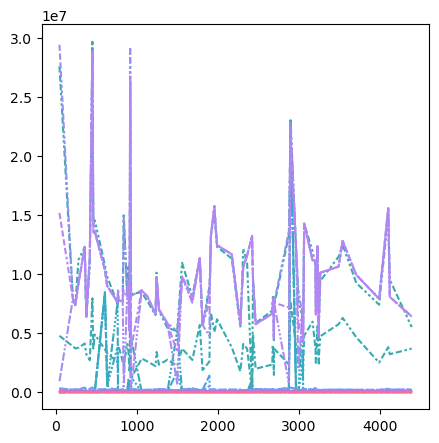

In [81]:
plt.figure(figsize=(5, 5))
sns.lineplot(data=clients_0, legend=False)

<Axes: >

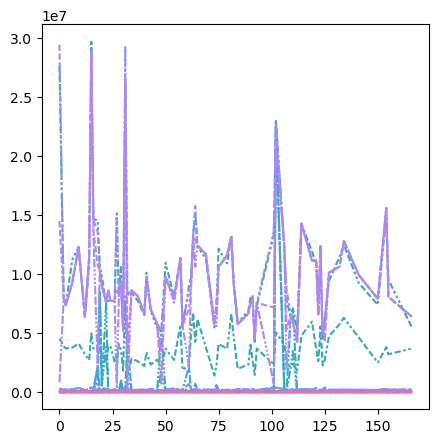

In [82]:
plt.figure(figsize=(5, 5))
sns.lineplot(data=clients_1, legend=False)

<Axes: >

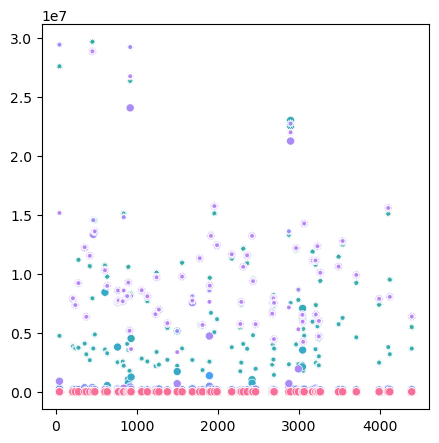

In [84]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=clients_0, legend=False)

In [60]:
df_id

,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,col2173,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
0,491,0,0,0.000000,0.000000,0.00000,0.000000,2.000000,2.000000,0.000000,...,1.000000,1.000000,29.110000,29.110000,29.110000,1.910000,1.910000,1.910000,152.000000,0.256261
1,359,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,...,1.000000,1.000000,39.790000,39.790000,39.790000,1.960000,1.960000,1.960000,184.000000,0.256261
2,637,0,0,0.000000,0.000000,0.00000,2.000000,2.000000,2.000000,0.000000,...,1.000000,1.000000,27.080000,27.080000,27.080000,0.000000,0.000000,0.000000,332.556663,0.256261
3,2895,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,21.150000,21.150000,21.150000,1.910000,1.910000,1.910000,803.000000,0.256261
4,3302,0,0,0.054597,0.207788,0.42486,0.632162,1.246588,2.250191,0.146193,...,1.406408,1.438338,41.995904,38.487048,40.250542,1.313308,1.197255,1.250674,332.556663,0.256261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,4994,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,3.000000,0.000000,...,2.000000,2.000000,49.080000,49.080000,49.080000,1.670000,1.670000,1.670000,244.000000,0.258007
14452,1798,0,0,0.000000,0.000000,6.00000,6.000000,6.000000,6.000000,0.000000,...,1.000000,1.692308,50.700000,23.310000,35.687692,0.000000,0.000000,0.000000,32.000000,0.268392
14453,3415,0,0,0.000000,0.000000,0.00000,0.000000,3.000000,3.000000,0.000000,...,4.000000,4.000000,76.900000,76.900000,76.900000,7.400000,7.400000,7.400000,93.000000,0.261126
14454,3707,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,34.310000,34.310000,34.310000,1.290000,1.290000,1.290000,450.000000,0.256061


In [61]:
df_id[df_id['target'] == 1].groupby('client_id').agg('count')

,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,col2173,col2174,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
client_id,,,,,,,,,,,,,,,,,,,,,
51,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
210,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
264,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
300,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
302,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7744,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
8041,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8067,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [62]:
id_cl_one = df_id[df_id['target'] == 1].groupby('client_id').agg('count').reset_index().query('target == 1')['client_id']

Это те у кого есть единичка и только одна:

In [63]:
df_id.query('client_id in @id_cl_one')

,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,col2173,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
14,7262,1,0,1.0,2.0,4.0,4.0,4.0,4.0,2.0,...,3.0,3.0,74.08,13.78,43.930,0.98,0.98,0.980,45.000000,0.261514
32,2945,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,29.25,29.25,29.250,1.70,1.70,1.700,873.000000,0.256261
133,5470,1,0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,...,1.0,1.0,36.75,36.75,36.750,2.10,2.10,2.100,15.000000,0.256261
138,3986,1,0,0.0,2.0,5.0,5.0,5.0,5.0,2.0,...,1.0,1.0,37.10,24.97,32.148,2.15,1.27,1.698,26.000000,0.256261
398,8067,1,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,63.50,63.50,63.500,2.25,2.25,2.250,332.556663,0.256061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13802,1613,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,29.27,29.27,29.270,4.00,4.00,4.000,444.000000,0.314386
14016,3827,1,0,0.0,0.0,2.0,3.0,3.0,3.0,0.0,...,2.0,2.0,59.02,59.02,59.020,2.09,2.09,2.090,60.000000,0.267761
14083,4128,1,0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,...,1.0,1.0,23.68,23.68,23.680,1.26,1.26,1.260,152.000000,0.261987
14235,530,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,49.10,49.10,49.100,0.00,0.00,0.000,991.000000,0.299116


In [64]:
one_dop = df_id.query('client_id in @id_cl_one & target == 1')

In [65]:
one_dop.groupby('client_id').agg('count')

,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,col2173,col2174,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
client_id,,,,,,,,,,,,,,,,,,,,,
354,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
415,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
530,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1032,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1150,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1414,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1494,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1524,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1613,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [66]:
id_cl_two = df_id[df_id['target'] == 1].groupby('client_id').agg('count').reset_index().query('target == 2')['client_id']

In [67]:
df_id.query('client_id in @id_cl_two & target == 1').groupby('client_id').agg('mean').reset_index()

,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,col2173,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
0,474,1.0,0.0,0.0,1.0,2.5,2.5,2.5,2.5,1.0,...,2.0,2.0,62.30,62.30,62.300000,1.850,1.85,1.8500,183.278331,0.265912
1,584,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,3.0,3.0,68.58,64.12,65.235000,2.270,2.11,2.2300,291.000000,0.269615
2,1117,1.0,0.5,0.0,0.0,0.0,0.0,1.0,3.0,0.0,...,2.0,2.0,58.50,58.50,58.500000,1.960,1.96,1.9600,186.000000,0.257017
3,1164,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,34.49,2.31,18.177636,0.000,0.00,0.0000,565.000000,0.274838
4,1330,1.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,...,3.0,3.0,75.12,75.12,75.120000,2.370,2.37,2.3700,51.000000,0.259207
5,1750,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,36.20,36.20,36.200000,2.150,2.15,2.1500,886.000000,0.258883
6,3032,1.0,0.0,0.5,0.5,0.5,0.5,0.5,4.5,0.5,...,2.0,2.0,43.20,23.05,37.675000,0.000,0.00,0.0000,201.000000,0.289148
7,3226,1.0,0.0,0.0,0.0,1.5,3.0,3.0,3.0,0.0,...,2.0,2.0,50.38,50.38,50.380000,0.000,0.00,0.0000,51.000000,0.256261
8,3256,1.0,0.0,0.0,0.0,3.5,7.0,7.0,7.0,0.0,...,2.0,2.0,63.65,62.25,62.850000,2.250,0.85,1.4500,55.000000,0.264948
9,3597,1.0,0.0,0.5,2.0,2.0,2.0,2.0,2.0,0.5,...,3.0,3.0,75.60,75.60,75.600000,2.370,2.37,2.3700,179.278331,0.256261


In [68]:
two_dop = df_id.query('client_id in @id_cl_two & target == 1').groupby('client_id').agg('mean').reset_index()

In [69]:
two_dop.groupby('client_id').agg('count')

,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,col2173,col2174,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
client_id,,,,,,,,,,,,,,,,,,,,,
474,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
584,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1117,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1164,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1330,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1750,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3032,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3226,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3256,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [70]:
two_dop.head()

,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,col2173,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
0,474,1.0,0.0,0.0,1.0,2.5,2.5,2.5,2.5,1.0,...,2.0,2.0,62.30,62.30,62.300000,1.85,1.85,1.85,183.278331,0.265912
1,584,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,3.0,3.0,68.58,64.12,65.235000,2.27,2.11,2.23,291.000000,0.269615
2,1117,1.0,0.5,0.0,0.0,0.0,0.0,1.0,3.0,0.0,...,2.0,2.0,58.50,58.50,58.500000,1.96,1.96,1.96,186.000000,0.257017
3,1164,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,34.49,2.31,18.177636,0.00,0.00,0.00,565.000000,0.274838
4,1330,1.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,...,3.0,3.0,75.12,75.12,75.120000,2.37,2.37,2.37,51.000000,0.259207


In [71]:
df_id.head()

,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,col2173,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
0,491,0,0,0.000000,0.000000,0.00000,0.000000,2.000000,2.000000,0.000000,...,1.000000,1.000000,29.110000,29.110000,29.110000,1.910000,1.910000,1.910000,152.000000,0.256261
1,359,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,...,1.000000,1.000000,39.790000,39.790000,39.790000,1.960000,1.960000,1.960000,184.000000,0.256261
2,637,0,0,0.000000,0.000000,0.00000,2.000000,2.000000,2.000000,0.000000,...,1.000000,1.000000,27.080000,27.080000,27.080000,0.000000,0.000000,0.000000,332.556663,0.256261
3,2895,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,21.150000,21.150000,21.150000,1.910000,1.910000,1.910000,803.000000,0.256261
4,3302,0,0,0.054597,0.207788,0.42486,0.632162,1.246588,2.250191,0.146193,...,1.406408,1.438338,41.995904,38.487048,40.250542,1.313308,1.197255,1.250674,332.556663,0.256261


In [72]:
synt = pd.concat([df_id, two_dop], axis=0).reset_index(drop=True)

In [73]:
synt

,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,col2173,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
0,491,0.0,0.0,0.000000,0.000000,0.00000,0.000000,2.000000,2.000000,0.000000,...,1.000000,1.000000,29.110000,29.110000,29.110000,1.910000,1.910000,1.910000,152.000000,0.256261
1,359,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,...,1.000000,1.000000,39.790000,39.790000,39.790000,1.960000,1.960000,1.960000,184.000000,0.256261
2,637,0.0,0.0,0.000000,0.000000,0.00000,2.000000,2.000000,2.000000,0.000000,...,1.000000,1.000000,27.080000,27.080000,27.080000,0.000000,0.000000,0.000000,332.556663,0.256261
3,2895,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,21.150000,21.150000,21.150000,1.910000,1.910000,1.910000,803.000000,0.256261
4,3302,0.0,0.0,0.054597,0.207788,0.42486,0.632162,1.246588,2.250191,0.146193,...,1.406408,1.438338,41.995904,38.487048,40.250542,1.313308,1.197255,1.250674,332.556663,0.256261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14482,6743,1.0,0.0,1.000000,1.500000,3.00000,3.000000,3.000000,3.000000,1.500000,...,2.000000,2.000000,50.170000,50.170000,50.170000,2.130000,2.130000,2.130000,21.500000,0.256261
14483,7116,1.0,0.0,0.000000,3.000000,6.00000,6.000000,6.000000,6.000000,3.000000,...,2.000000,2.500000,57.270000,55.680000,56.475000,2.250000,0.000000,1.125000,27.500000,0.260005
14484,7156,1.0,0.0,0.000000,0.000000,0.00000,2.500000,4.000000,4.000000,0.000000,...,2.000000,2.000000,57.950000,50.120000,54.035000,1.100000,1.040000,1.070000,75.000000,0.256261
14485,7196,1.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,3.000000,0.000000,...,1.000000,1.500000,43.400000,31.360000,37.380000,0.000000,0.000000,0.000000,290.000000,0.297572


In [74]:
synt[synt['target'] == 1].groupby('client_id').agg('count')['target'].unique()

array([3, 1], dtype=int64)

In [75]:
synt = pd.concat([synt, one_dop, one_dop])

In [76]:
synt[synt['target'] == 1].groupby('client_id').agg('count')['target'].unique()

array([3], dtype=int64)

In [77]:
synt[synt['target'] == 1].groupby('client_id').agg('count')

,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,col2173,col2174,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
client_id,,,,,,,,,,,,,,,,,,,,,
51,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
210,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
264,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
300,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
302,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7744,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
8041,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
8067,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [79]:
synt

,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,col2173,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
0,491,0.0,0.0,0.000000,0.000000,0.00000,0.000000,2.000000,2.000000,0.000000,...,1.000000,1.000000,29.110000,29.110000,29.110000,1.910000,1.910000,1.910000,152.000000,0.256261
1,359,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,...,1.000000,1.000000,39.790000,39.790000,39.790000,1.960000,1.960000,1.960000,184.000000,0.256261
2,637,0.0,0.0,0.000000,0.000000,0.00000,2.000000,2.000000,2.000000,0.000000,...,1.000000,1.000000,27.080000,27.080000,27.080000,0.000000,0.000000,0.000000,332.556663,0.256261
3,2895,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,21.150000,21.150000,21.150000,1.910000,1.910000,1.910000,803.000000,0.256261
4,3302,0.0,0.0,0.054597,0.207788,0.42486,0.632162,1.246588,2.250191,0.146193,...,1.406408,1.438338,41.995904,38.487048,40.250542,1.313308,1.197255,1.250674,332.556663,0.256261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13802,1613,1.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,29.270000,29.270000,29.270000,4.000000,4.000000,4.000000,444.000000,0.314386
14016,3827,1.0,0.0,0.000000,0.000000,2.00000,3.000000,3.000000,3.000000,0.000000,...,2.000000,2.000000,59.020000,59.020000,59.020000,2.090000,2.090000,2.090000,60.000000,0.267761
14083,4128,1.0,0.0,0.000000,0.000000,0.00000,0.000000,3.000000,3.000000,0.000000,...,1.000000,1.000000,23.680000,23.680000,23.680000,1.260000,1.260000,1.260000,152.000000,0.261987
14235,530,1.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,49.100000,49.100000,49.100000,0.000000,0.000000,0.000000,991.000000,0.299116


In [80]:
synt.to_csv('synthetic_clients')